# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

# Dataset load

In [5]:
df = pd.read_csv('train .csv', usecols=['Age','Pclass','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


## See missing value percentage

In [6]:
df.isnull().mean()*100

,0
Survived,0.00000
Pclass,0.00000
Age,19.86532
Fare,0.00000


<Axes: ylabel='Density'>

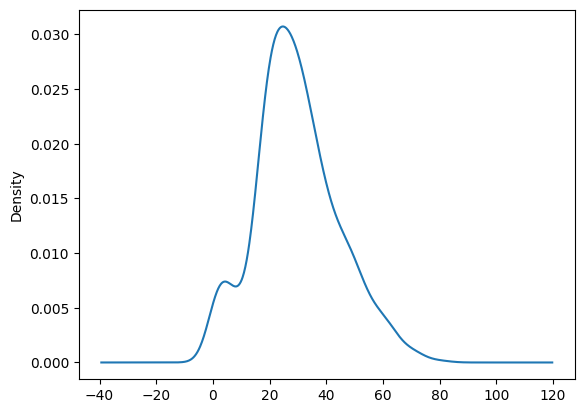

In [7]:
df['Age'].plot(kind='kde')

# Train test split

In [13]:
df['Survived']

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [14]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Imputer

In [16]:
imputer = KNNImputer(n_neighbors=3, weights='uniform')

In [17]:
X_train_trf = imputer.fit_transform(X_train)
X_test_trf = imputer.transform(X_test)

In [19]:
X_train_trf

array([[  1.    ,  45.5   ,  28.5   ],
       [  2.    ,  23.    ,  13.    ],
       [  3.    ,  32.    ,   7.925 ],
       ...,
       [  3.    ,  41.    ,  14.1083],
       [  1.    ,  14.    , 120.    ],
       [  1.    ,  21.    ,  77.2875]])

In [33]:
imputer.n_features_in_

3

In [34]:
imputer.feature_names_in_

array(['Pclass', 'Age', 'Fare'], dtype=object)

# Create new DataFrame

In [20]:
new_df = pd.DataFrame(X_train_trf, columns=X_train.columns)
new_df.head()

,Pclass,Age,Fare
0,1.0,45.5,28.5000
1,2.0,23.0,13.0000
2,3.0,32.0,7.9250
3,3.0,26.0,7.8542
4,3.0,6.0,31.2750


In [21]:
new_df.isnull().sum()

,0
Pclass,0
Age,0
Fare,0


# See distribution

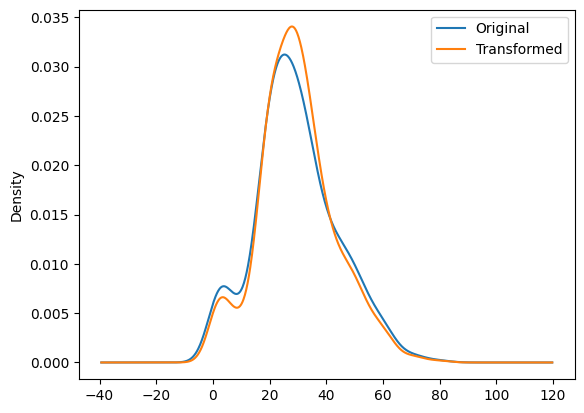

In [28]:
X_train['Age'].plot(kind='kde')
new_df['Age'].plot(kind='kde')

plt.legend(['Original', 'Transformed'])
plt.show()

In [29]:
X_train.var()

,0
Pclass,0.679939
Age,210.251707
Fare,2700.831981


In [30]:
new_df.var()

,0
Pclass,0.679939
Age,181.528599
Fare,2700.831981


In [31]:
new_df.cov()

,Pclass,Age,Fare
Pclass,0.679939,-3.974883,-23.431910
Age,-3.974883,181.528599,69.817237
Fare,-23.431910,69.817237,2700.831981


In [32]:
X_train.cov()

,Pclass,Age,Fare
Pclass,0.679939,-4.288674,-23.431910
Age,-4.288674,210.251707,71.580633
Fare,-23.431910,71.580633,2700.831981
